<a href="https://colab.research.google.com/github/SankitSinghal/Machine-Learning-project/blob/main/ML_Experiment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Perform Exploratory Data Analysis (EDA) in Python on 'cars.csv' dataset

In [4]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#Reading Dataset
df=pd.read_csv("/content/cars.csv")
print(df.iloc[:5,:3])

   S.No.                              Name    Location
0      0            Maruti Wagon R LXI CNG      Mumbai
1      1  Hyundai Creta 1.6 CRDi SX Option        Pune
2      2                      Honda Jazz V     Chennai
3      3                 Maruti Ertiga VDI     Chennai
4      4   Audi A4 New 2.0 TDI Multitronic  Coimbatore


In [6]:
#Data type and information about data
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB
None


In [7]:
#Check for Duplication
print(df.nunique())

S.No.                7253
Name                 2041
Location               11
Year                   23
Kilometers_Driven    3660
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               450
Engine                150
Power                 386
Seats                   9
New_Price             625
Price                1373
dtype: int64


In [8]:
#Check for Missing Values
print(df.isnull().sum())

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64


Data Reduction

In [9]:
#Introducing a new column, “Age”
from datetime import date
df['Age']=date.today().year-df['Year']
print(df.loc[:5,['Year','Age']])

   Year  Age
0  2010   15
1  2015   10
2  2011   14
3  2012   13
4  2013   12
5  2012   13


In [10]:
#Introducing a new columns, “Brand” and "Model"
df['Brand']=df['Name'].str.split().str.get(0)
df['Model']=df['Name'].str.split().str.get(1)+df['Name'].str.split().str.get(2)
print(df.loc[:5,['Name','Brand','Model']])

                               Name    Brand      Model
0            Maruti Wagon R LXI CNG   Maruti     WagonR
1  Hyundai Creta 1.6 CRDi SX Option  Hyundai   Creta1.6
2                      Honda Jazz V    Honda      JazzV
3                 Maruti Ertiga VDI   Maruti  ErtigaVDI
4   Audi A4 New 2.0 TDI Multitronic     Audi      A4New
5   Hyundai EON LPG Era Plus Option  Hyundai     EONLPG


Data Cleaning/Wrangling

In [11]:
#Checking unique values in Brand column
print(df['Brand'].unique())
print(df['Brand'].nunique())

['Maruti' 'Hyundai' 'Honda' 'Audi' 'Nissan' 'Toyota' 'Volkswagen' 'Tata'
 'Land' 'Mitsubishi' 'Renault' 'Mercedes-Benz' 'BMW' 'Mahindra' 'Ford'
 'Porsche' 'Datsun' 'Jaguar' 'Volvo' 'Chevrolet' 'Skoda' 'Mini' 'Fiat'
 'Jeep' 'Smart' 'Ambassador' 'Isuzu' 'ISUZU' 'Force' 'Bentley'
 'Lamborghini' 'Hindustan' 'OpelCorsa']
33


In [12]:
#Checking for words ISUZU,Isuzu,Mini,Land in Brand
temp=df[df['Brand'].str.contains('ISUZU|Isuzu|Mini|Land')]
print(temp[['Name','Brand','Year']].head())
print("Total rows: ",len(temp))

                                    Name Brand  Year
13      Land Rover Range Rover 2.2L Pure  Land  2014
14        Land Rover Freelander 2 TD4 SE  Land  2012
176             Mini Countryman Cooper D  Mini  2017
191  Land Rover Range Rover 2.2L Dynamic  Land  2018
228            Mini Cooper Convertible S  Mini  2017
Total rows:  103


In [13]:
#Replacing words
df['Brand'].replace({'ISUZU':'Isuzu','Mini':'Mini Cooper','Land':'Land Rover'},inplace=True)
print(df['Brand'].unique())

['Maruti' 'Hyundai' 'Honda' 'Audi' 'Nissan' 'Toyota' 'Volkswagen' 'Tata'
 'Land Rover' 'Mitsubishi' 'Renault' 'Mercedes-Benz' 'BMW' 'Mahindra'
 'Ford' 'Porsche' 'Datsun' 'Jaguar' 'Volvo' 'Chevrolet' 'Skoda'
 'Mini Cooper' 'Fiat' 'Jeep' 'Smart' 'Ambassador' 'Isuzu' 'Force'
 'Bentley' 'Lamborghini' 'Hindustan' 'OpelCorsa']


Statistics Summary

In [14]:
#Using describe() function
print(df.describe())

             S.No.         Year  Kilometers_Driven        Seats        Price  \
count  7253.000000  7253.000000       7.253000e+03  7200.000000  6019.000000   
mean   3626.000000  2013.365366       5.869906e+04     5.279722     9.479468   
std    2093.905084     3.254421       8.442772e+04     0.811660    11.187917   
min       0.000000  1996.000000       1.710000e+02     0.000000     0.440000   
25%    1813.000000  2011.000000       3.400000e+04     5.000000     3.500000   
50%    3626.000000  2014.000000       5.341600e+04     5.000000     5.640000   
75%    5439.000000  2016.000000       7.300000e+04     5.000000     9.950000   
max    7252.000000  2019.000000       6.500000e+06    10.000000   160.000000   

               Age  
count  7253.000000  
mean     11.634634  
std       3.254421  
min       6.000000  
25%       9.000000  
50%      11.000000  
75%      14.000000  
max      29.000000  


In [15]:
#Using describe(include='all') function
print(df.describe(include='all'))

              S.No.                    Name Location         Year  \
count   7253.000000                    7253     7253  7253.000000   
unique          NaN                    2041       11          NaN   
top             NaN  Mahindra XUV500 W8 2WD   Mumbai          NaN   
freq            NaN                      55      949          NaN   
mean    3626.000000                     NaN      NaN  2013.365366   
std     2093.905084                     NaN      NaN     3.254421   
min        0.000000                     NaN      NaN  1996.000000   
25%     1813.000000                     NaN      NaN  2011.000000   
50%     3626.000000                     NaN      NaN  2014.000000   
75%     5439.000000                     NaN      NaN  2016.000000   
max     7252.000000                     NaN      NaN  2019.000000   

        Kilometers_Driven Fuel_Type Transmission Owner_Type    Mileage  \
count        7.253000e+03      7253         7253       7253       7251   
unique                N

In [16]:
#separate Numerical and categorical variables
cat=list(df.select_dtypes(include='object').columns)
print("Categorical variables: ",cat)
num=list(df.select_dtypes(exclude='object').columns)
print("Numerical variables: ",num)

Categorical variables:  ['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'New_Price', 'Brand', 'Model']
Numerical variables:  ['S.No.', 'Year', 'Kilometers_Driven', 'Seats', 'Price', 'Age']


 EDA Univariate Analysis


Skewness:  1


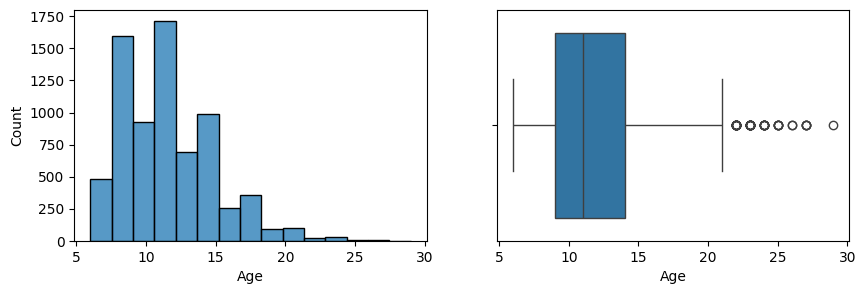

In [17]:
#Univariate analysis using Histogram and  Box Plot on Numerical variable
print("Skewness: ",round(df['Age'].skew()))
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
sns.histplot(df['Age'],bins=15)
plt.subplot(1,2,2)
sns.boxplot(x=df['Age'])
plt.show()

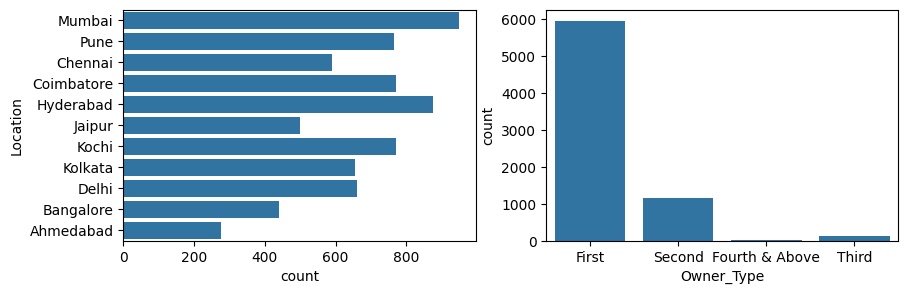

In [19]:
#Univariate analysis using count plot on categorical variables
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
sns.countplot(y='Location',data=df)
plt.subplot(1,2,2)
sns.countplot(x='Owner_Type',data=df)
plt.show()

Data Transformation

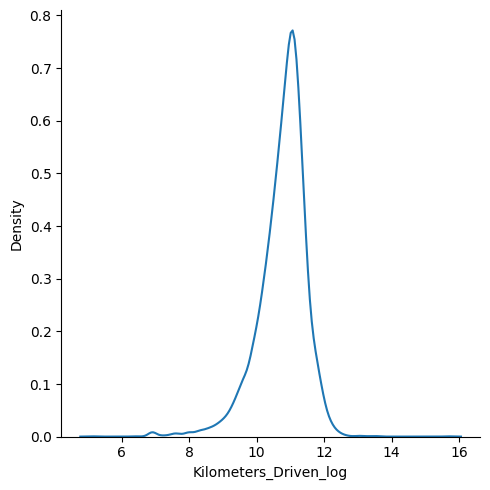

In [20]:
#Log transformation of the feature 'Kilometers_Driven'
df['Kilometers_Driven_log']=np.log(df['Kilometers_Driven'])
df['Price_log']=np.log(df['Price'])
sns.displot(df['Kilometers_Driven_log'],kind='kde')
plt.show()

EDA Bivariate Analysis

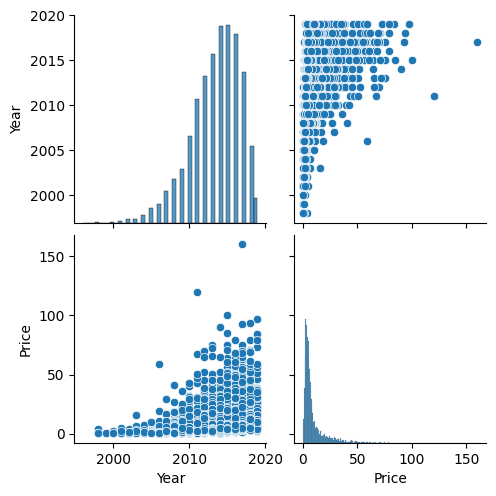

In [21]:
#Bivariate analysis using Pair plot on Numerical variable
sns.pairplot(df[['Year','Price']])
plt.show()

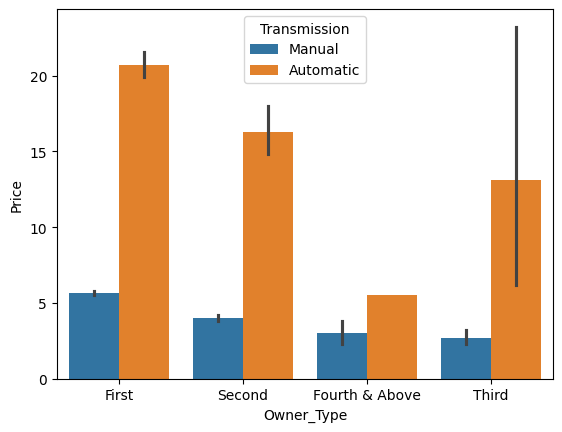

In [22]:
#Bivariate analysis using Bar plot on categorical variable
sns.barplot(x='Owner_Type',y='Price',data=df,hue='Transmission')
plt.show()

EDA Multivariate Analysis



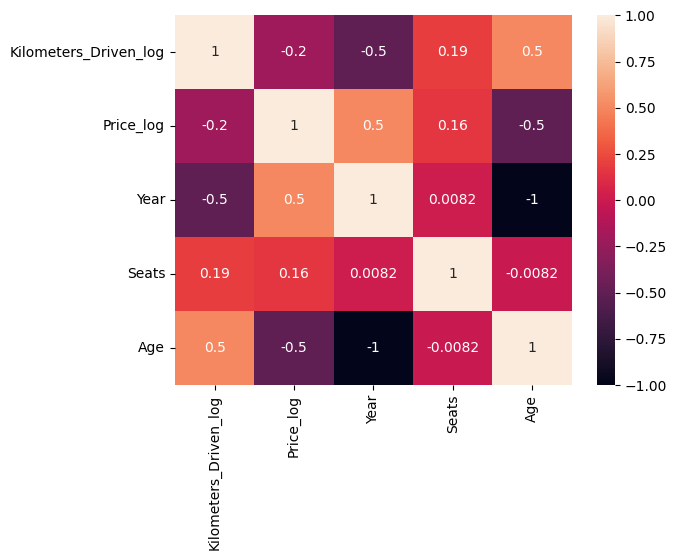

In [23]:
#Multivariate analysis using Heat map showing the correlation between the variables
sns.heatmap(df[['Kilometers_Driven_log','Price_log','Year','Seats','Age']].corr(),vmin=-1,vmax=1,annot=True)
plt.show()